# Import Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler,LabelEncoder
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import GridSearchCV

# Load Data

In [3]:
iris = pd.read_csv("Iris.csv")
iris = iris.drop(['Id'],axis=1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
label = LabelEncoder()
species_trans = label.fit_transform(iris['Species'])
iris['Species'] = species_trans
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
X = iris.drop(['Species'],axis=1)
Y = iris['Species']

# Split Dataset

In [6]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [7]:

tree = DecisionTreeClassifier(max_depth=5,min_samples_split=2,random_state=0)

tree.fit(X_train,Y_train)

X_train_pred = tree.predict(X_train)
X_test_pred = tree.predict(X_test)

train_acc = accuracy_score(Y_train,X_train_pred)
test_acc = accuracy_score(Y_test,X_test_pred)

print(f'train accuracy : {train_acc}')
print(f'test accuracy : {test_acc}')


train accuracy : 1.0
test accuracy : 0.9666666666666667


In [8]:
print(classification_report(Y_train,X_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        40

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [9]:
print(classification_report(Y_test,X_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



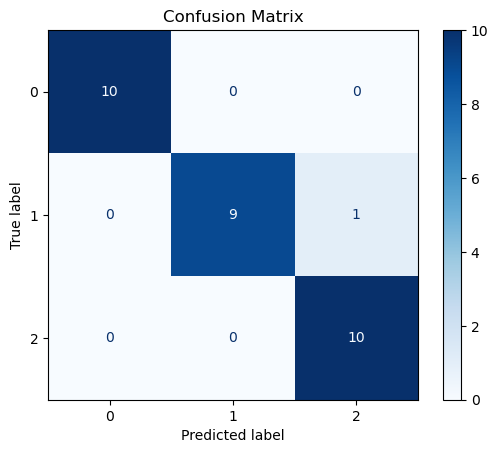

In [11]:
conf_mat = confusion_matrix(Y_test, X_test_pred)
Matrix = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
Matrix.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

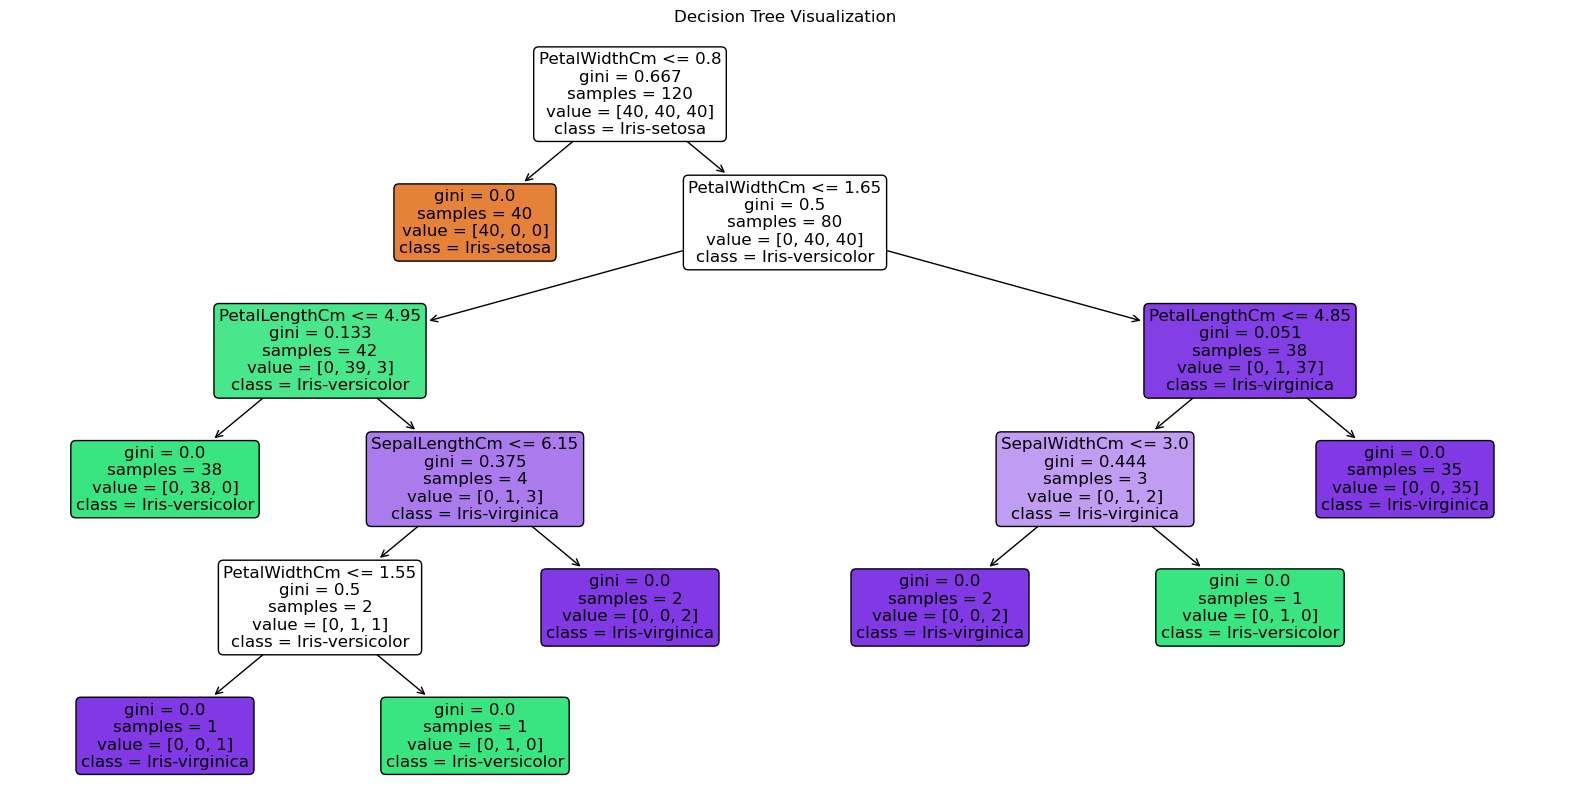

In [12]:
plt.figure(figsize=(20,10))
plot_tree(
    tree,
    feature_names=X.columns,
    class_names=label.classes_,
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Decision Tree Visualization")
plt.show()


In [13]:
param = {
    "max_depth" : [None,2,3,4,5,6,7,8,9,10],
    "min_samples_split" : range(2,50),
    "criterion" : ['gini','entropy','log_loss'],
    "min_samples_leaf" : [1,2,3,4,5],
    "max_features" : ["auto", "sqrt", "log2"]
}

In [14]:
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=0),
    param_grid = param,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, Y_train)


c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': range(2, 50)},
             scoring='accuracy')

In [15]:
print(f"Best Parameters from GridSearchCV: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

Best Parameters from GridSearchCV: {'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 32}
Best Cross-Validation Accuracy: 0.9667


In [16]:
best_tree = grid_search.best_estimator_


X_train_pred_best = best_tree.predict(X_train)
train_accuracy_best = accuracy_score(Y_train, X_train_pred_best)
print(f"Train Accuracy with Best Parameters: {train_accuracy_best:}")


X_test_pred_best = best_tree.predict(X_test)
test_acc_best = accuracy_score(Y_test, X_test_pred_best)
print(f"Test Accuracy with Best Parameters: {test_acc_best:.4f}")

Train Accuracy with Best Parameters: 0.9666666666666667
Test Accuracy with Best Parameters: 0.9333


In [17]:

print("Classification Report - Training Set (Best Estimator):")
print(classification_report(Y_train, X_train_pred_best, target_names=label.classes_))

print("Classification Report - Testing Set (Best Estimator):")
print(classification_report(Y_test, X_test_pred_best, target_names=label.classes_))

Classification Report - Training Set (Best Estimator):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       0.93      0.97      0.95        40
 Iris-virginica       0.97      0.93      0.95        40

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.97      0.97      0.97       120

Classification Report - Testing Set (Best Estimator):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



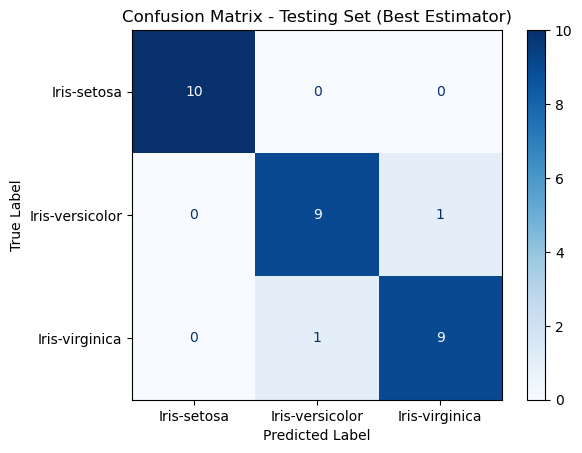

: 

In [ ]:

conf_mat_best = confusion_matrix(Y_test, X_test_pred_best)
Matrix_best = ConfusionMatrixDisplay(confusion_matrix=conf_mat_best, display_labels=label.classes_)
Matrix_best.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - Testing Set (Best Estimator)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
